# Lesson 12: Reinforcement Learning

## Intro to Quantified Cognition

<a href="https://colab.research.google.com/github/compmem/QuantCog/blob/2020_Spring/notebooks/12_Reinforcement_Learning.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Lesson plan

- Introduce Machine Learning
- Fundamentals of Reinforcement Learning
- 

![](https://cdn.app.compendium.com/uploads/user/e7c690e8-6ff9-102a-ac6d-e4aebca50425/03391c68-5c5e-493c-95a5-a92b492b9025/Image/5effec57771fb85b9fbaaafc87fbb27d/picture1.png)

## Fundamentals of RL

- Reinforcement learning (RL) is can combine both Supervised and Unsupervised Learning.
- The goal is for the *agent* to learn *actions* to take in an environment to maximize *reward*.

### Policy

Defines how the agent behaves in the environment. This is typically a mapping between perceived states of the world and possible actions. The policy is essentially the "rules to live by" for the agent.

### Reward function

The rewards (and punishments) define the goals of RL problem. The environment provides a reward signal to the agent at every time step. 

The policy can be adjusted to maximize rewards and the agent can influence the rewards by performing different actions in the environment to change the state or (where possible) alter the environment directly.

### Value function

This function estimates the predicted future reward for a given state or state--action pair. Learning this function is at the core of RL and is the information that guides the policy governing behavior in the environment.

### Model of the environment (optional)

Although not required for all RL algorithms, it is often useful for the agent to learn a model of the environment that estimates what agent *thinks* will happen when performing specific actions in a particular state. 


## Markov Decision Problem

Most RL can be formalized as a Markov Decision Problem (MDP) that involves sensing the *states* and perfoming *actions* to achieve a *goal*. 

The key feature of an MDP is that the probability of ending up in some new state $s_{t+1}'$ given that you are in the current state $s_t$ and perform action $a_t$ only depends on the current state and not any previous states. That is to say, all of the history can be integrated into the current state $s_t.$

<img src="https://miro.medium.com/max/1400/1*QF9pmAOS5-Dn1B7RUH1zUA.png" 
     alt="gridworld" width="400"/>


## Maximizing *future* reward

The goal of an agent is usually to maximize *future* reward, not just immediate reward. Thus an optimal policy can often have the agent forgo an immediate reward in order to gain more more rewards in the future:

<img src="https://www.sciencenews.org/wp-content/uploads/2018/06/062918_BB_marshmallow-test_feat.jpg" 
     alt="marshmallows" width="500"/>

To keep this problem tracktable, instead of estimating out to infinity, the agent can estimate the *discounted* future reward:


$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \gamma^3 R_{t+4}... = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$$


## Calculating value

Estimating value is at the core of all RL algorithms. Value functions ($v$) are dependent on the policy ($\pi$) for estimating future reward for a given state ($s$):

$$v_\pi(s) = \mathbb{E}_\pi(R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \gamma^3 R_{t+4}... \vert S_t=s)$$

This estimates the discounted future value of a state given the current policy. To guide decisions for how to act, the agent must also estimate the value of taking a particular action in a given state, which can be learned via the temporal difference learning and the Bellman Equation:

$$Q_\pi(s_t, a_t) = Q_\pi(s_t, a_t) + \alpha (R_t + \gamma max(Q_\pi(s_{t+1}, a_{t+1})) - Q_\pi(s_t, a_t))$$

## Exploration vs. Exploitation

During learning, the agent must adopt a policy that balances exploration of the environment with exploitation of current knowledge. Usually this is accomplished by biasing the agent to make more random decisions at the start of learning and gradually shift to exploiting learned values later.

## Successor Representation

Hybrid of Model-based and Model-free RL developed by Peter Dayan (1993), where the agent learns a model of the world and, separately, the reward values at each state they've experienced. Specifically, the agent learns the expected discounted number of future visitations of all states given a current state and action:

$$M = M + \alpha(f_{i+1} + \gamma Mf_{i+1} - Mf_i) f_i^T$$


Thus, it is possible for and agent to make predictions of future states given specific state--actions and combine that information with known rewards/punishments to guide the policy.

## Frisbee on a frozen lake problem

"Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend."

https://gym.openai.com/envs/FrozenLake8x8-v0/

## *ONLY* if on Google Colab

In [ ]:
# to install more libraries
!pip install gym

## Load modules of power

In [1]:
# load matplotlib inline mode
%matplotlib inline

# import some useful libraries
import numpy as np                # numerical analysis linear algebra
import matplotlib.pyplot as plt   # plotting

from IPython.display import display, clear_output
import time

import gym
from gym.envs.toy_text import frozen_lake


In [2]:
# define the environment
size = 8
p_frozen = 0.8
slippery = False

# generate a random map
desc = frozen_lake.generate_random_map(size=size, p=p_frozen)
env = frozen_lake.FrozenLakeEnv(desc=desc,
                                is_slippery=slippery)


In [3]:
### reset the environment and get the initial state
observation = env.reset()
display(print(env.render(mode='ansi')))

# loop for a max number of iterations
for t in range(100):
    # pick an action at random
    action = int(input('0=L, 1=D, 2=R, 3=U:'))
    #action = env.action_space.sample()
    
    # take that action and observe the results
    observation, reward, done, info = env.step(action)
    
    # draw the new state to the screen
    clear_output(wait=True)
    display(print(env.render(mode='ansi')))
    
    # see if we're done (either by falling in a hole or reaching the goal)
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
    time.sleep(.25)

  (Right)
SFHFFFFF
FFHFFFFH
FFFFHFFF
FFFHFFHF
HFFHFFHF
FFFHHFFF
FFFFFFHF
HFFFFFFG



None

Episode finished after 2 timesteps


In [4]:
# params
gamma = .99
alpha = .5
rho = .25
tau = 20.0
p_rand = 0.0
hole_penalty = -1.0
off_board_penalty = -0.0

# set up our agent
n_actions = env.action_space.n
n_states = env.observation_space.n
states = np.eye(n_states)
rewards = np.zeros(n_states)
M = np.zeros((n_actions, n_states, n_states))
scores = []

# define a policy
def pick_action(f0, M, rewards, tau, p_rand=0.0):
    # apply policy to pick action
    if p_rand > 0.0 and np.random.rand() < p_rand:
        # pick a random action
        action = env.action_space.sample()
    else:
        Q = np.dot(np.dot(M, f0), rewards)
        #action = np.random.choice(np.where(Q==Q.max())[0])
        #action = np.argmax(Q)
        pQ = np.exp(Q*tau)/np.exp(Q*tau).sum()
        action = np.argmax(np.random.rand() < np.cumsum(pQ))
    return action


  (Right)
SFHFFFFF
FFHFFFFH
FFFFHFFF
FFFHFFHF
HFFHFFHF
FFFHHFFF
FFFFFFHF
HFFFFFFG


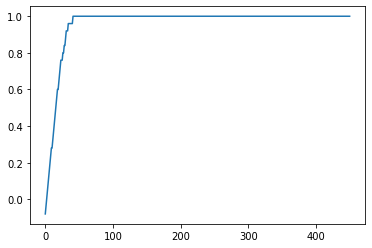

In [6]:
for r in range(500):
    # reset for new attempt at recovering the frisbee
    observation = env.reset()
    last_obs = observation
    f0 = states[observation]
    t0 = states[observation]
    
    for i in range(1000):
        # pick an action
        action = pick_action(f0, M, rewards, tau, p_rand=p_rand)
        
        # observe new state
        observation, reward, done, info = env.step(action)
        
        # turn the new state into a vector representation
        f1 = states[observation]

        # learn via successor representation
        # prediction from previous state
        p0 = np.dot(M[action], f0)
        
        # observed outcome, plus discounted future prediction
        # when following that policy
        f1_action = pick_action(f1, M, rewards, tau, p_rand=p_rand)
        o1 = (f1 + gamma*(np.dot(M[f1_action], f1)))
        
        # update the association for that action
        M[action] += alpha * np.outer((o1 - p0), t0)

        # update context (eligibility trace)
        t1 = rho*t0 + (1-rho)*f1

        # process the reward if any
        if done and reward==0:
            # get negative rewards for falling in a hole
            reward = hole_penalty
            
        if last_obs == observation:
            # action gave rise to no change in movement
            reward = off_board_penalty

        # update our representation of rewards/punishments at the observed state
        rewards[observation] += alpha*(reward - rewards[observation])

        # see if we're done
        if done:
            #print("Episode finished after {} timesteps with reward {}".format(i+1, reward))
            # save out our final reward/punishment
            scores.append(reward)
            break

        # prepare for next iteration
        f0 = f1
        t0 = t1
        last_obs = observation

# render the final state
env.render()

# plot a moving average of scores
N=50
plt.plot(np.convolve(scores, np.ones((N,))/N, mode='valid'))

('LEFT', 1.8456383296074665e-08) ('DOWN', 0.9999938053446692) ('RIGHT', 6.158255177501519e-06) ('UP', 1.7943769811239414e-08)


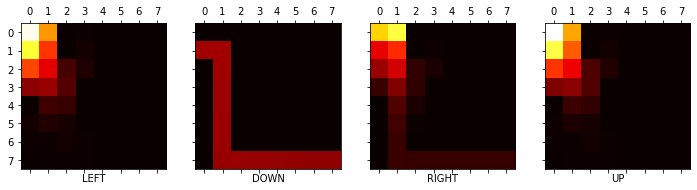

In [8]:
# see predicted outcomes for different actions at a particular state
state = 0
fig,ax = plt.subplots(1, 4, figsize=(12,5), sharex=True, sharey=True)
acts = ['LEFT', 'DOWN', 'RIGHT', 'UP']

# get the min and max values for plot normalization
pmin = 0.0
pmax = 0.0
for i in range(n_actions):
    pred = np.dot(M, states[state])[i]
    pmin = min(pred.min(), pmin)
    pmax = max(pred.max(), pmax)

# do the plot
for i in range(n_actions):
    pred = np.dot(M, states[state])[i]
    ax[i].matshow((pred.reshape((size, size))), vmin=pmin, vmax=pmax, cmap='hot')
    ax[i].set_xlabel(acts[i])

# print out model-based predictions for state-actions
Q = np.dot(np.dot(M, states[state]), rewards)
pQ = np.exp(Q*tau)/np.exp(Q*tau).sum()
print(*zip(acts, pQ))

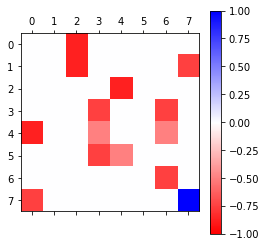

In [9]:
# see what state rewards it's learned
plt.matshow(rewards.reshape((size, size)), cmap='bwr_r', vmin=-1, vmax=1.0)
plt.colorbar()

In [10]:
# let's see the trained model in action!

# reset the to starting point
observation = env.reset()
f0 = states[observation]
for t in range(100):
    # pick an action following our policy
    action = pick_action(f0, M, rewards, tau, p_rand=p_rand)
    
    # observe the next state
    observation, reward, done, info = env.step(action)
    f0 = states[observation]
    
    # print it to the screen
    clear_output(wait=True)
    display(print(env.render(mode='ansi')))
    
    # see if we're done
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
    time.sleep(.25)

  (Right)
SFHFFFFF
FFHFFFFH
FFFFHFFF
FFFHFFHF
HFFHFFHF
FFFHHFFF
FFFFFFHF
HFFFFFFG



None

Episode finished after 14 timesteps


In [ ]:
new_desc = desc[:]
drow = list(new_desc[-1])
drow[-1] = 'H'
new_desc[-1] = ''.join(drow)
drow = list(new_desc[3])
drow[-1] = 'G'
new_desc[3] = ''.join(drow)
new_desc
env = frozen_lake.FrozenLakeEnv(desc=new_desc,
                                is_slippery=slippery)
env.render()

## Booyah!!!